In [4]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

import os
os.chdir('H:\\Datasets')


### Load the dataset “prisoners.csv” using pandas and display the first and last five rows in the dataset. 

In [5]:
prisoners = pd.read_csv('prisoners.csv')

In [6]:
prisoners.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [7]:
prisoners.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


### Use describe method in pandas and find out the number of columns. 

In [8]:
prisoners.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


In [9]:
zero_indexes = prisoners.loc[prisoners['No. of Inmates benefitted by Elementary Education']==0]
print(zero_indexes)

             STATE/UT  YEAR  \
1   Arunachal Pradesh  2013   
15            Manipur  2013   
17            Mizoram  2013   
18           Nagaland  2013   
22             Sikkim  2013   
29         Chandigarh  2013   
30       D & N Haveli  2013   
31        Daman & Diu  2013   
33        Lakshadweep  2013   
34        Pondicherry  2013   

    No. of Inmates benefitted by Elementary Education  \
1                                                   0   
15                                                  0   
17                                                  0   
18                                                  0   
22                                                  0   
29                                                  0   
30                                                  0   
31                                                  0   
33                                                  0   
34                                                  0   

    No. of Inmates benefitted 

### Create a new column -’total_benefitted’ that is a sum of inmates benefitted through all modes.

In [10]:
prisoners["total_benefited"]=prisoners.sum(axis=1)

In [11]:
prisoners.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefited
0,Andhra Pradesh,2013,9480,13758,672,170,26093
1,Arunachal Pradesh,2013,0,0,0,0,2013
2,Assam,2013,676,750,14,30,3483
3,Bihar,2013,1693,3013,125,1417,8261
4,Chhatisgarh,2013,1664,1803,192,103,5775


### Make a bar plot with each state name on the x -axis and their total benefitted inmates astheir bar heights. Which state has the maximum number of beneficiaries?

<BarContainer object of 35 artists>

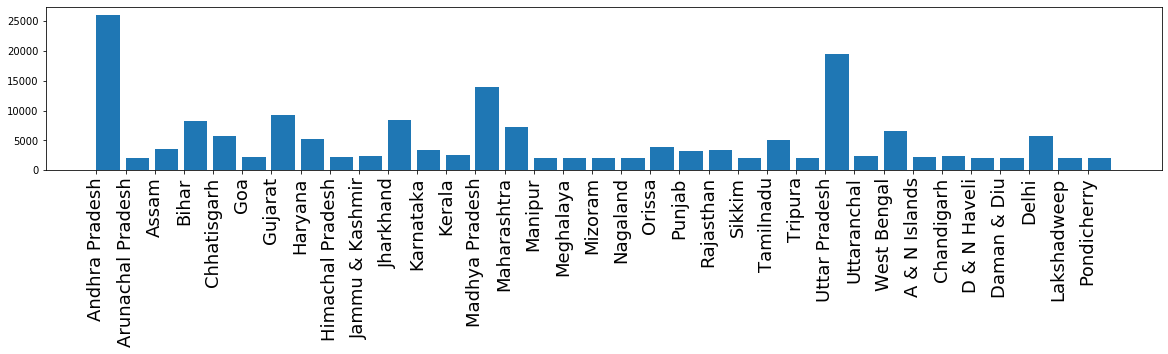

In [12]:
import numpy as np
xlabels = prisoners['STATE/UT'].values

plot.figure(figsize=(20, 3))
plot.xticks(np.arange(xlabels.shape[0]),xlabels,rotation='vertical', fontsize=18)
plot.xticks

plot.bar(np.arange(prisoners.values.shape[0]),prisoners['total_benefited'],align='edge')

# Andhra Pradesh has the maximum number of beneficiaries

### Create a new row -“totals” that is the sum of all inmates benefitted through each mode across all states.

In [13]:
prisoners_total = prisoners.append(prisoners.sum(numeric_only=True), ignore_index=True)

### Make a pie chart that depicts the ratio among different modes of benefits.

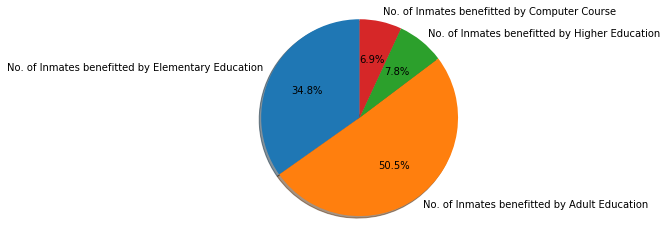

In [14]:
labels = prisoners.columns[2:-1]
sizes = prisoners_total.iloc[-1][2:-1].values
fig1, ax1 = plot.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plot.show()